<a href="https://colab.research.google.com/github/Shvan-Jaff/World-University-Ranking/blob/main/university_ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World University Rankings
#### Investigate the best universities in the world



## About Dataset
Of all the universities in the world, which are the best?

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other. This dataset contains three global university rankings from very different places.




### Supplementary Data
The Times Higher Education World University Ranking is widely regarded as one of the most influential and widely observed university measures. Founded in the United Kingdom in 2010, it has been criticized for its commercialization and for undermining non-English-instructing institutions.

The Academic Ranking of World Universities, also known as the Shanghai Ranking, is an equally influential ranking. It was founded in China in 2003 and has been criticized for focusing on raw research power and for undermining humanities and quality of instruction.

The Center for World University Rankings, is a less well know listing that comes from Saudi Arabia, it was founded in 2012.

How do these rankings compare to each other?
Are the various criticisms levied against these rankings fair or not?
How does your alma mater fare against the world?es.




### University Ranking Data
To further extend your analyses, we've also included two sets of supplementary data.

The first of these is a set of data on educational attainment around the world. It comes from The World Data Bank and comprises information from the UNESCO Institute for Statistics and the Barro-Lee Dataset. How does national educational attainment relate to the quality of each nation's universities?

The second supplementary dataset contains information about public and private direct expenditure on education across nations. This data comes from the National Center for Education Statistics. It represents expenditure as a percentage of gross domestic product. Does spending more on education lead to better international university rankings?world?es.




In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [4]:
mydata = pd.read_csv(r'World University Rankings.csv')

In [5]:
mydata.head(10)

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
5,6,California Institute of Technology,United States,"2,237",6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6
6,7,Princeton University,United States,"8,279",8.0,23%,46 : 54,92.4,87.6,95.9,99.1,66.0,80.3
7,8,"University of California, Berkeley",United States,"40,921",18.4,24%,52 : 48,92.1,86.4,95.8,99.0,76.8,78.4
8,9,Yale University,United States,"13,482",5.9,21%,52 : 48,91.4,92.6,92.7,97.0,55.0,70.9
9,10,Imperial College London,United Kingdom,"18,545",11.2,61%,40 : 60,90.4,82.8,90.8,98.3,59.8,97.5


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2341 non-null   object 
 1   Name of University           2233 non-null   object 
 2   Location                     2047 non-null   object 
 3   No of student                2209 non-null   object 
 4   No of student per staff      2208 non-null   float64
 5   International Student        2209 non-null   object 
 6   Female:Male Ratio            2128 non-null   object 
 7   OverAll Score                1799 non-null   object 
 8   Teaching Score               1799 non-null   float64
 9   Research Score               1799 non-null   float64
 10  Citations Score              1799 non-null   float64
 11  Industry Income Score        1799 non-null   float64
 12  International Outlook Score  1799 non-null   float64
dtypes: float64(6), obj

In [7]:
mydata.describe()

,No of student per staff,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
count,2208.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,19.000408,27.018010,23.016898,48.495887,47.104558,46.880378
std,12.132224,13.282243,16.763819,27.967185,15.093682,22.582401
min,0.400000,11.600000,7.400000,0.800000,36.900000,14.100000
25%,12.600000,18.000000,11.300000,23.100000,37.800000,27.900000
50%,16.600000,22.700000,17.000000,47.200000,40.500000,42.100000
75%,22.200000,31.850000,28.900000,72.350000,48.300000,62.100000
max,232.200000,94.800000,99.700000,100.000000,100.000000,99.700000


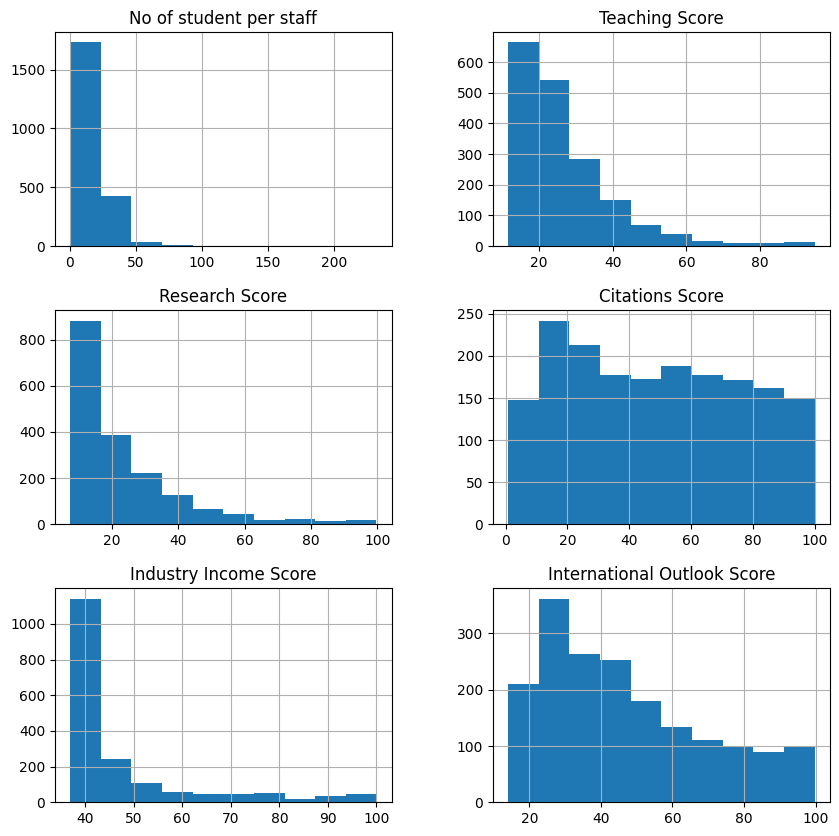

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(10,10))
plt.show()

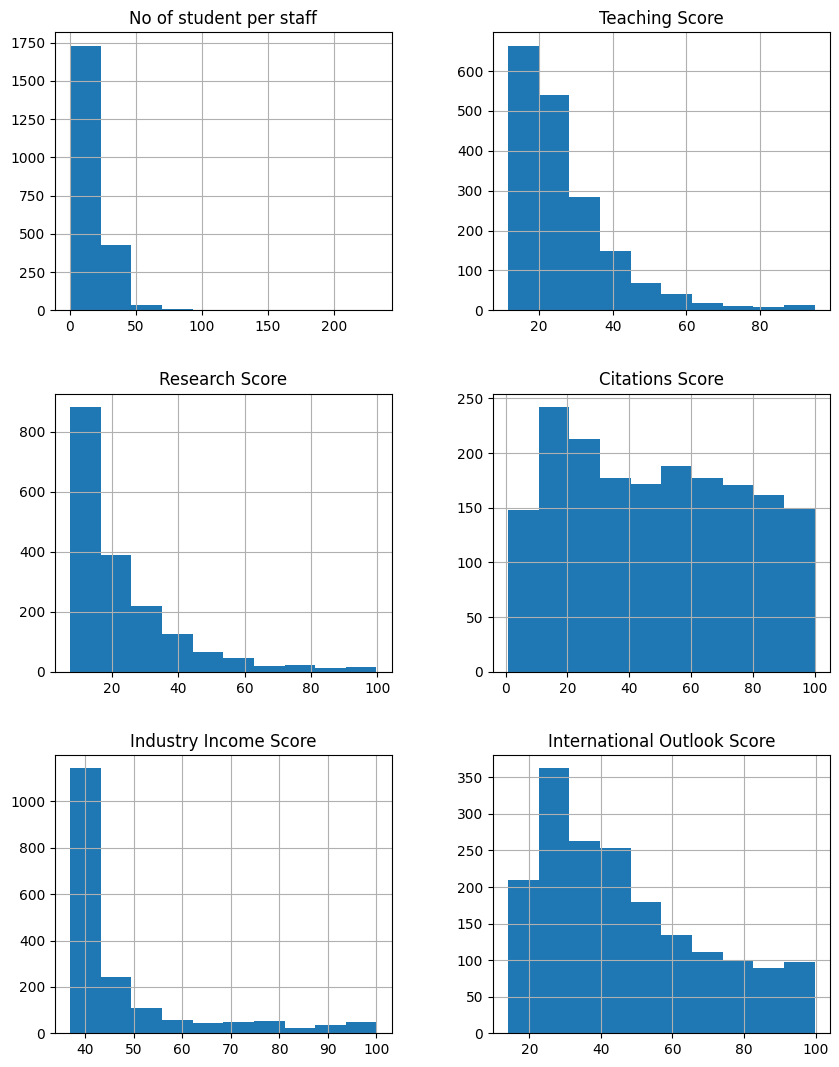

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(10,13))
plt.show()

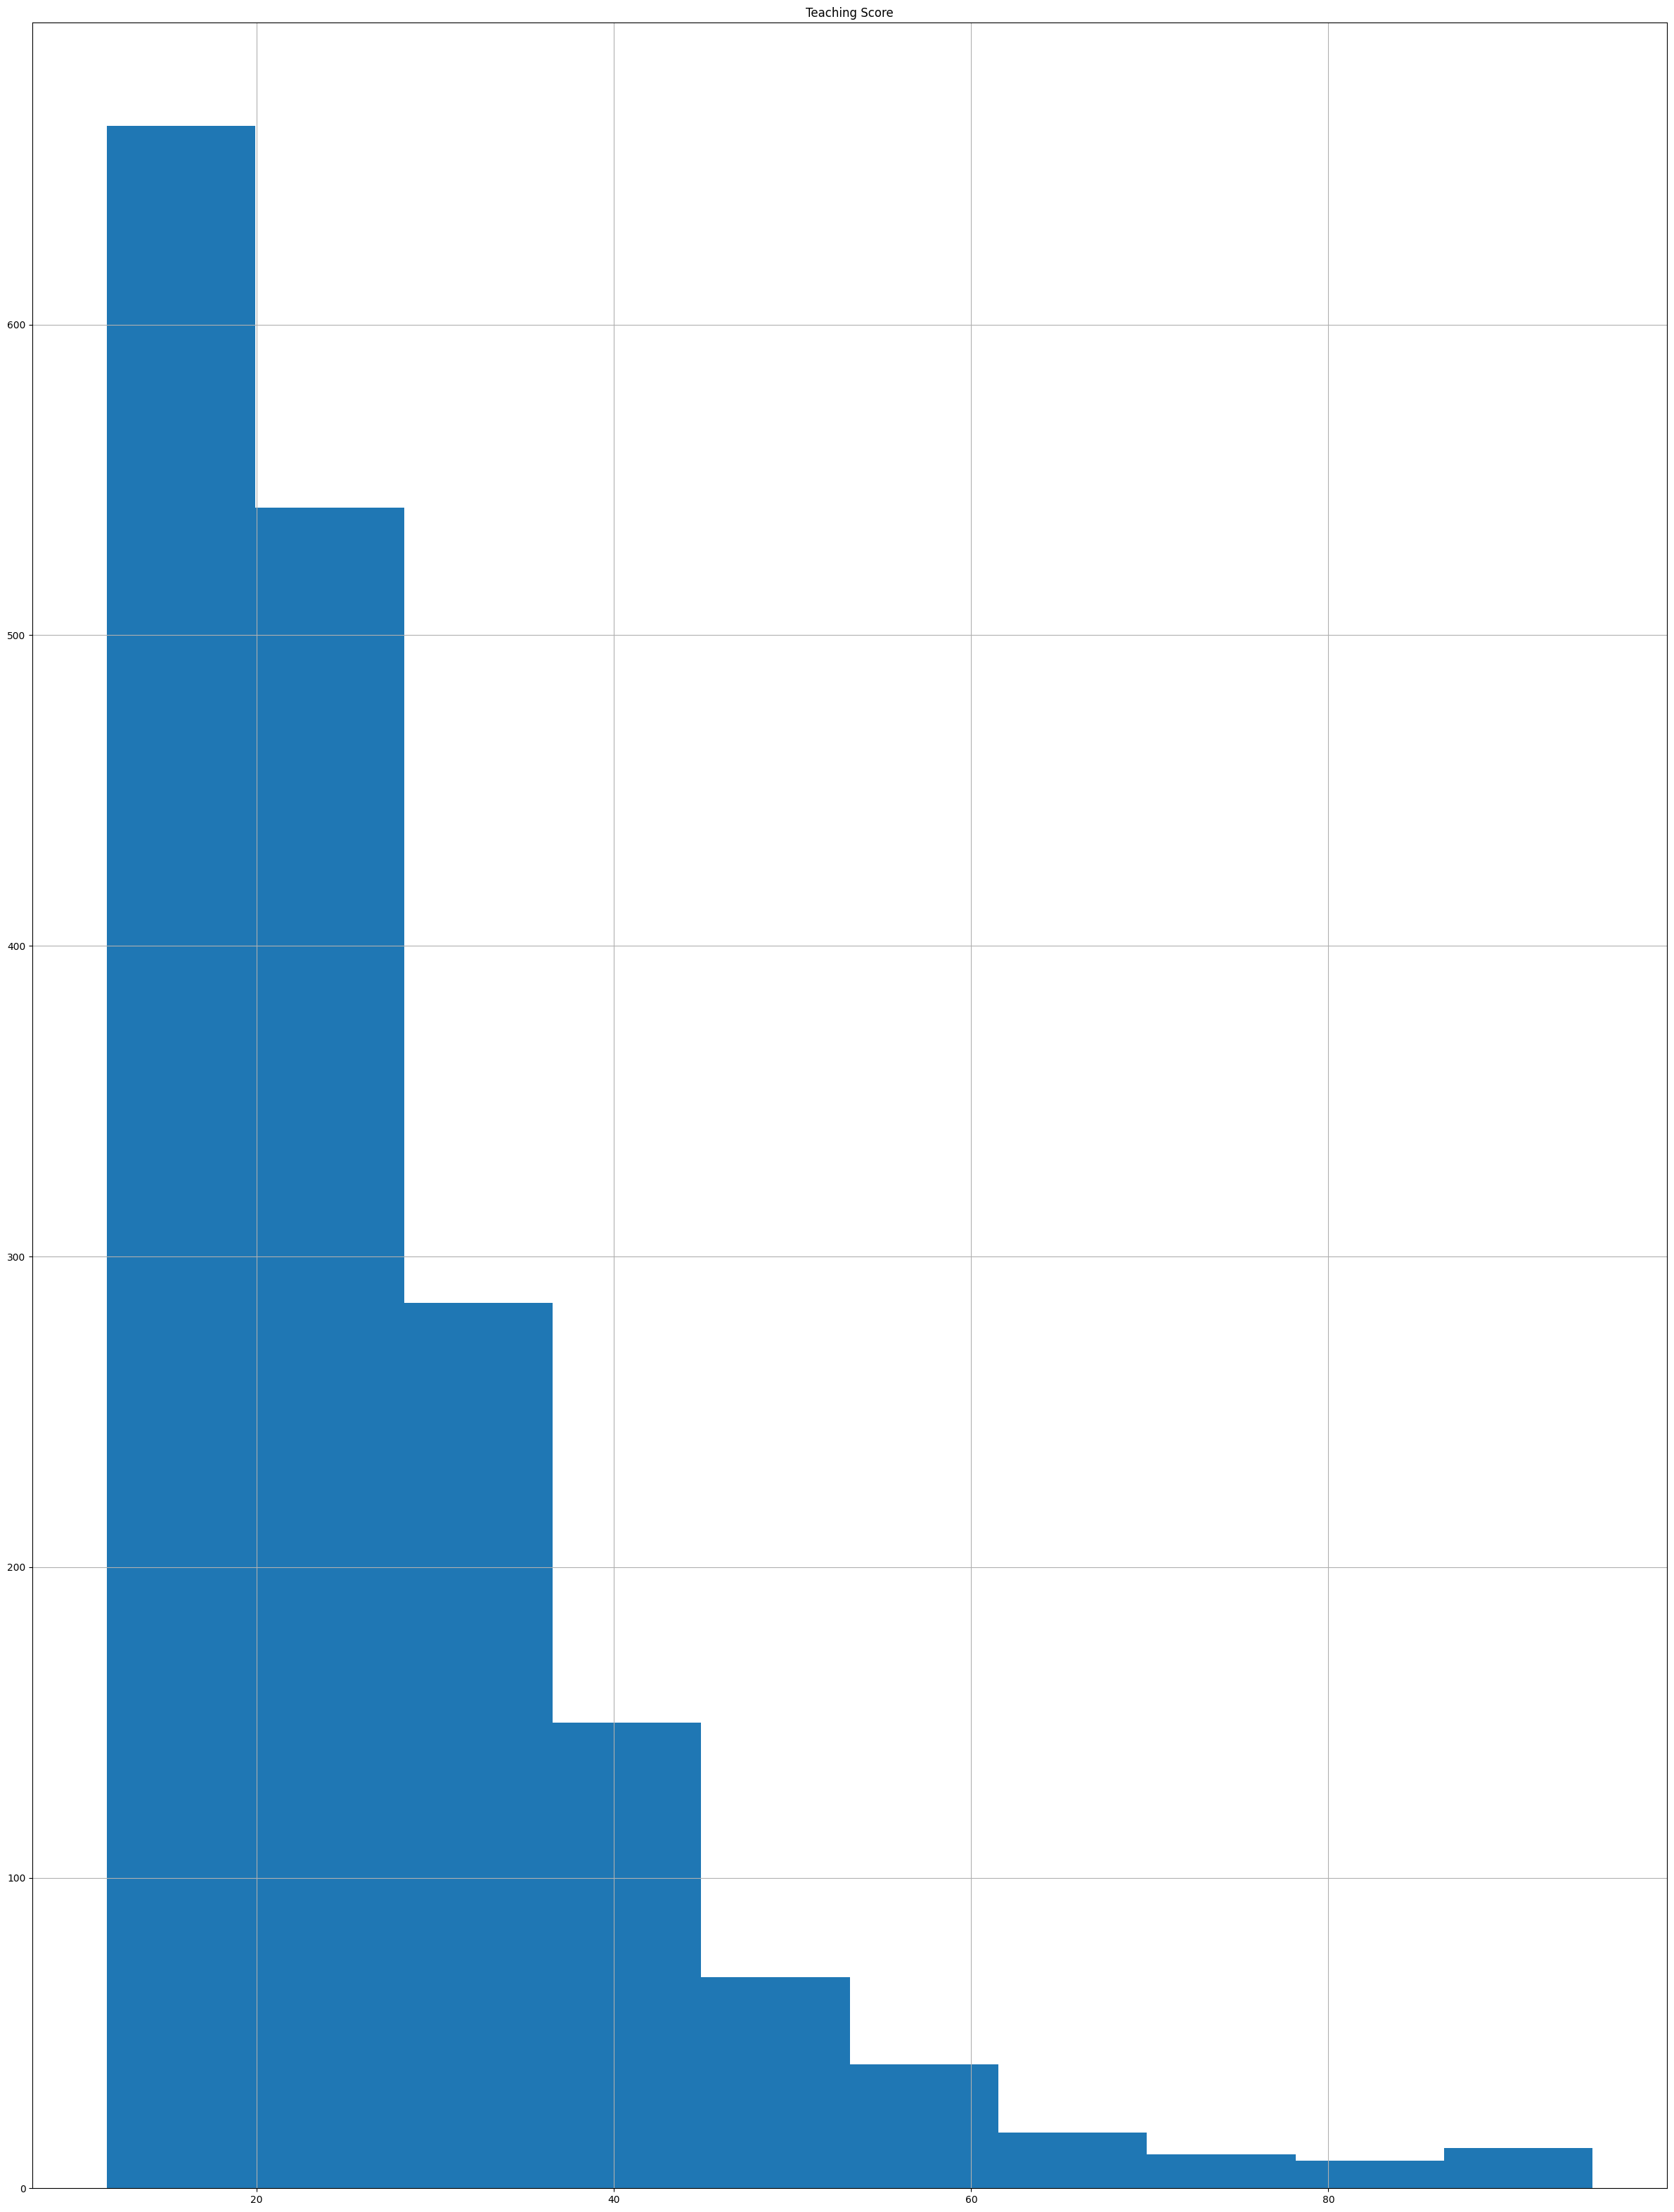

In [10]:
mydata.hist(['Teaching Score'], figsize=(30,40))
plt.show()

<Axes: xlabel='Location', ylabel='Teaching Score'>

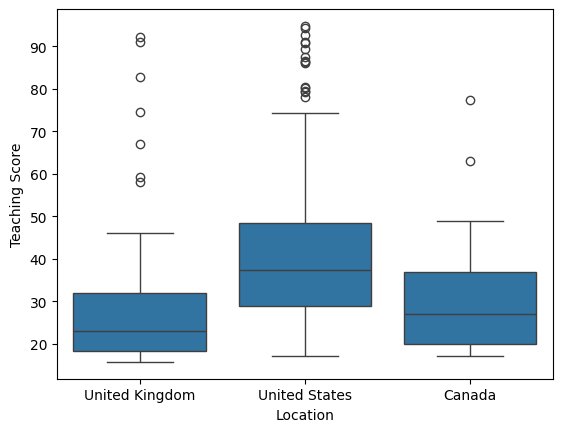

In [11]:
import seaborn as sns
locations_to_include = ["United States", "United Kingdom", "Canada"]
filtered_data = mydata[mydata['Location'].isin(locations_to_include)]
sns.boxplot(x="Location", y="Teaching Score", data=filtered_data)

In [12]:
pd.crosstab(mydata['Name of University'].head(8),mydata['Teaching Score'].head(8) )

Teaching Score,86.4,87.6,90.7,90.9,92.3,94.2,94.8
Name of University,,,,,,,
California Institute of Technology,0,0,0,1,0,0,0
Harvard University,0,0,0,0,0,0,1
Massachusetts Institute of Technology,0,0,1,0,0,0,0
Princeton University,0,1,0,0,0,0,0
Stanford University,0,0,0,0,0,1,0
"University of California, Berkeley",1,0,0,0,0,0,0
University of Cambridge,0,0,0,1,0,0,0
University of Oxford,0,0,0,0,1,0,0


<Axes: xlabel='Location', ylabel='count'>

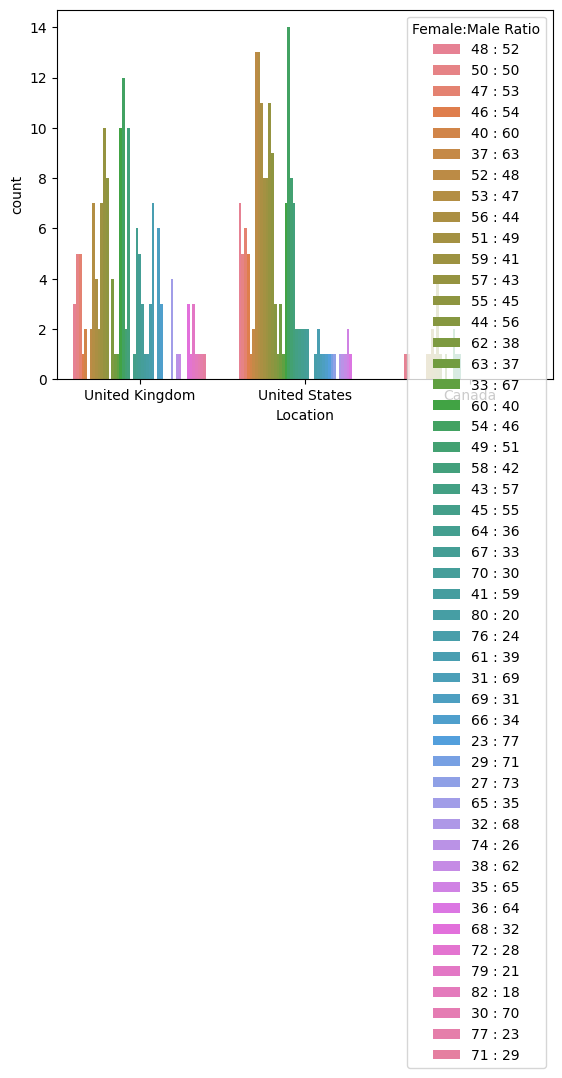

In [13]:
locations_to_include = ["United States", "United Kingdom", "Canada"]
filtered_data = mydata[mydata['Location'].isin(locations_to_include)]

sns.countplot(x='Location', hue='Female:Male Ratio', data=filtered_data)

In [14]:
pd.pivot_table(mydata.head(10), index=['Name of University', 'University Rank', 'Female:Male Ratio'],
                     columns=['Location'], aggfunc=len)

Citations Score  \
Location                                                                 United Kingdom   
Name of University                    University Rank Female:Male Ratio                   
California Institute of Technology    6               37 : 63                       NaN   
Harvard University                    2               50 : 50                       NaN   
Imperial College London               10              40 : 60                       1.0   
Massachusetts Institute of Technology 5               40 : 60                       NaN   
Princeton University                  7               46 : 54                       NaN   
Stanford University                   3               46 : 54                       NaN   
University of California, Berkeley    8               52 : 48                       NaN   
University of Cambridge               3               47 : 53                       1.0   
University of Oxford                  1               48 : 52                       1.0   
Yale University                       9               52 : 48                       NaN   

                                                                                       \
Location                                                                United States   
Name of University                    University Rank Female:Male Ratio                 
California Institute of Technology    6               37 : 63                     1.0   
Harvard University                    2               50 : 50                     1.0   
Imperial College London               10              40 : 60                     NaN   
Massachusetts Institute of Technology 5               40 : 60                     1.0   
Princeton University                  7               46 : 54                     1.0   
Stanford University                   3               46 : 54                     1.0   
University of California, Berkeley    8               52 : 48                     1.0   
University of Cambridge               3               47 : 53                     NaN   
University of Oxford                  1               48 : 52                     NaN   
Yale University                       9               52 : 48                     1.0   

                                                                        Industry Income Score  \
Location                                                                       United Kingdom   
Name of University                    University Rank Female:Male Ratio                         
California Institute of Technology    6               37 : 63                             NaN   
Harvard University                    2               50 : 50                             NaN   
Imperial College London               10              40 : 60                             1.0   
Massachusetts Institute of Technology 5               40 : 60                             NaN   
Princeton University                  7               46 : 54                             NaN   
Stanford University                   3               46 : 54                             NaN   
University of California, Berkeley    8               52 : 48                             NaN   
University of Cambridge               3               47 : 53                             1.0   
University of Oxford                  1               48 : 52                             1.0   
Yale University                       9               52 : 48                             NaN   

                                                                                       \
Location                                                                United States   
Name of University                    University Rank Female:Male Ratio                 
California Institute of Technology    6               37 : 63                     1.0   
Harvard University                    2               50 : 50                     1.0   
Imperial College London

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

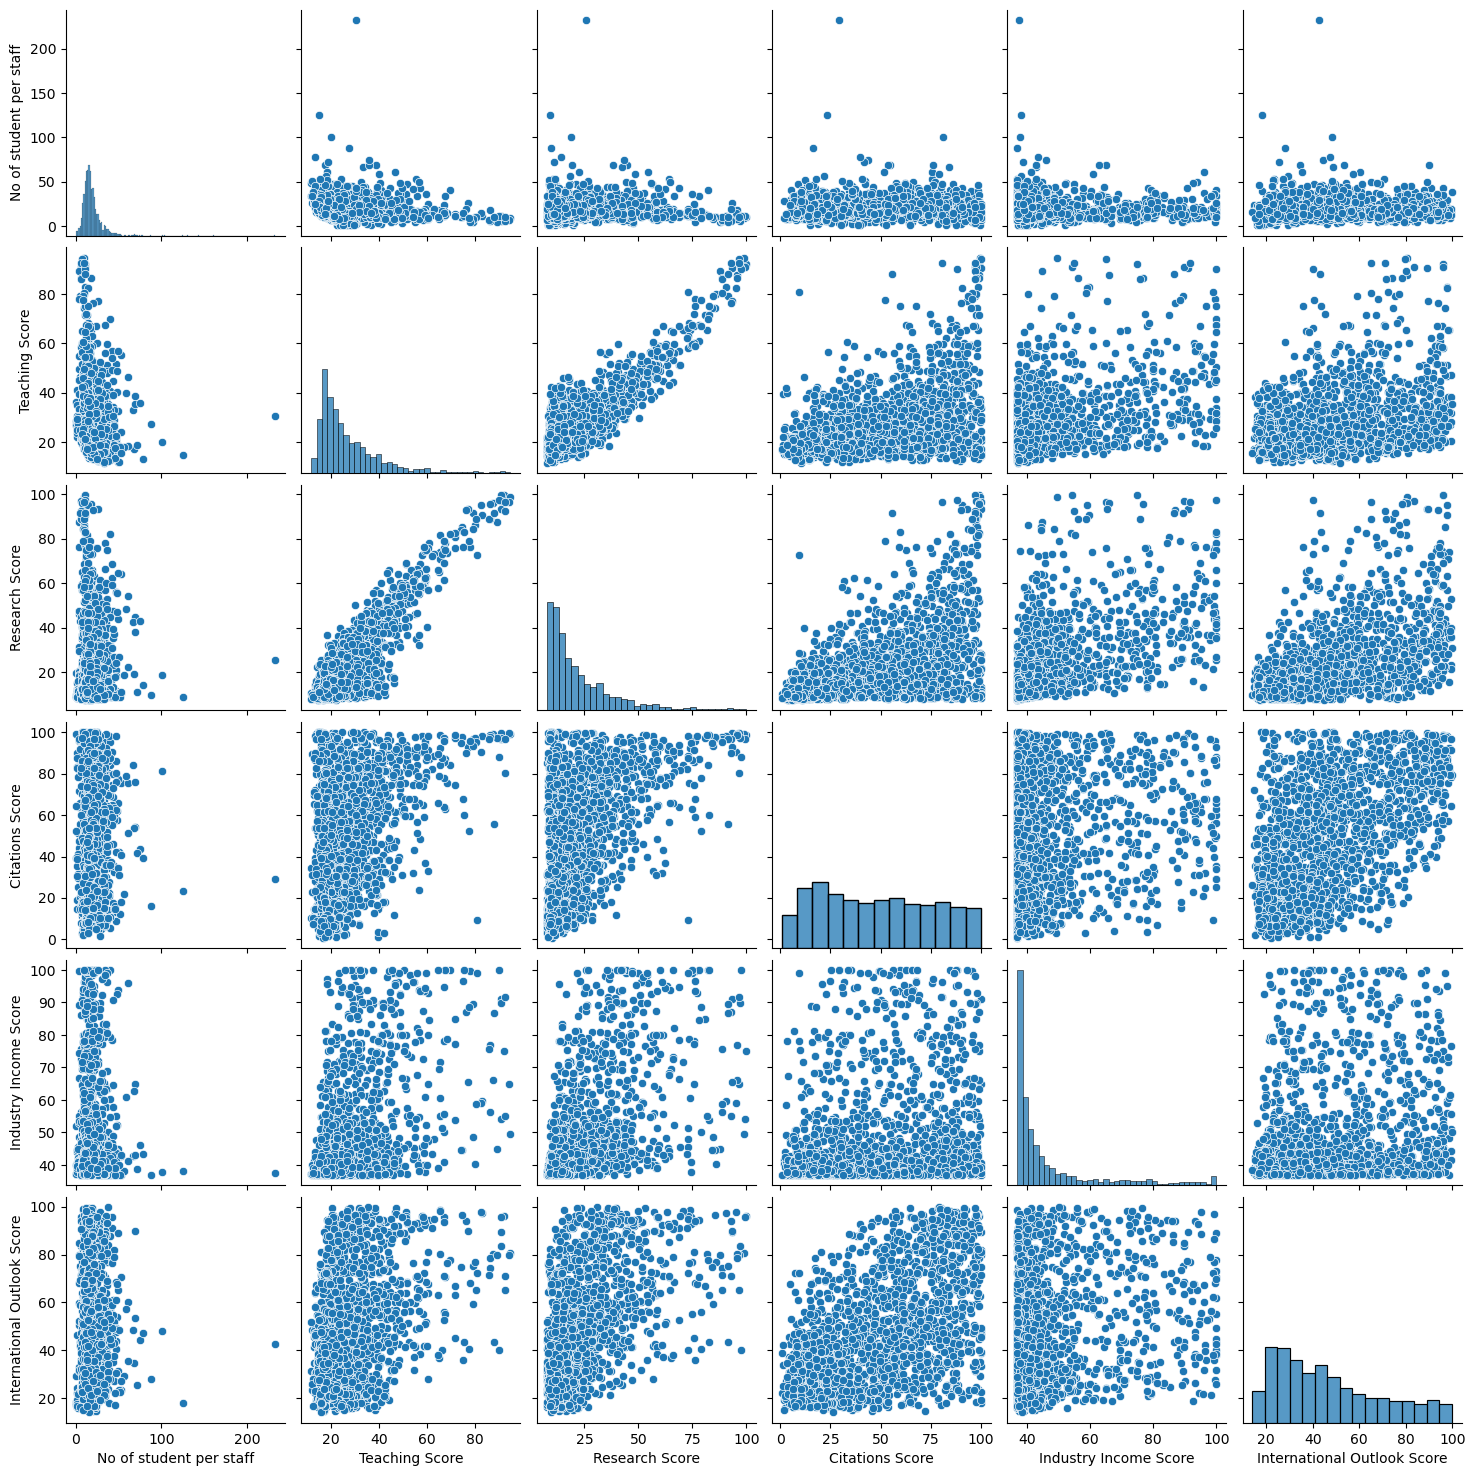

In [ ]:
sns.pairplot(mydata)

In [ ]:
mydata['Teaching Score'].std()

13.282242791347766

In [ ]:
mydata['Teaching Score'].mean()

27.018010005558644

In [ ]:
mydata['Teaching Score'].median()

22.7

C:\Users\shvan\AppData\Local\Temp\ipykernel_16624\3558439066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mydata['Teaching Score'])
C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Teaching Score', ylabel='Density'>

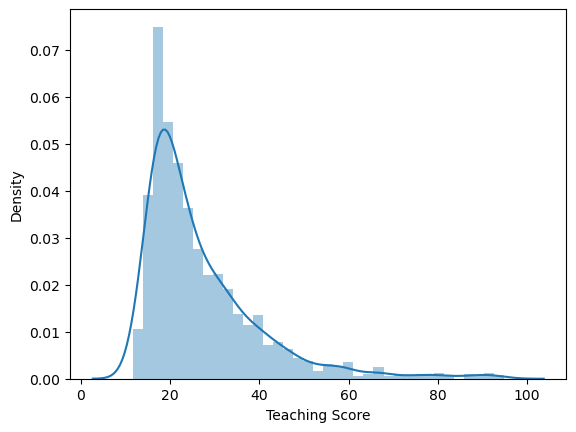

In [ ]:
sns.distplot(mydata['Teaching Score'])

array([[<Axes: title={'center': 'Canada'}>,
        <Axes: title={'center': 'United Kingdom'}>],
       [<Axes: title={'center': 'United States'}>, <Axes: >]],
      dtype=object)

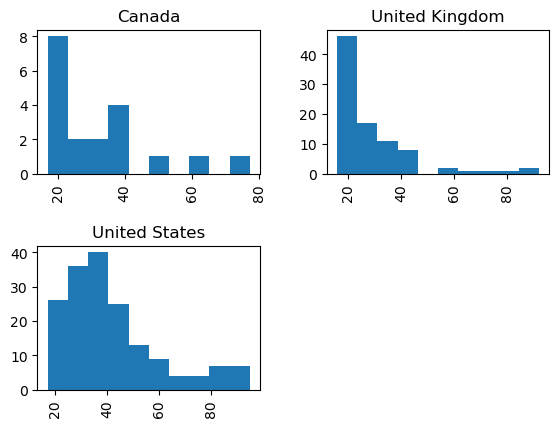

In [ ]:
locations_to_include = ["United States", "United Kingdom", "Canada"]
filtered_data = mydata[mydata['Location'].isin(locations_to_include)]
filtered_data.hist(by='Location', column='Teaching Score')

array([[<Axes: title={'center': 'Canada'}>,
        <Axes: title={'center': 'United Kingdom'}>],
       [<Axes: title={'center': 'United States'}>, <Axes: >]],
      dtype=object)

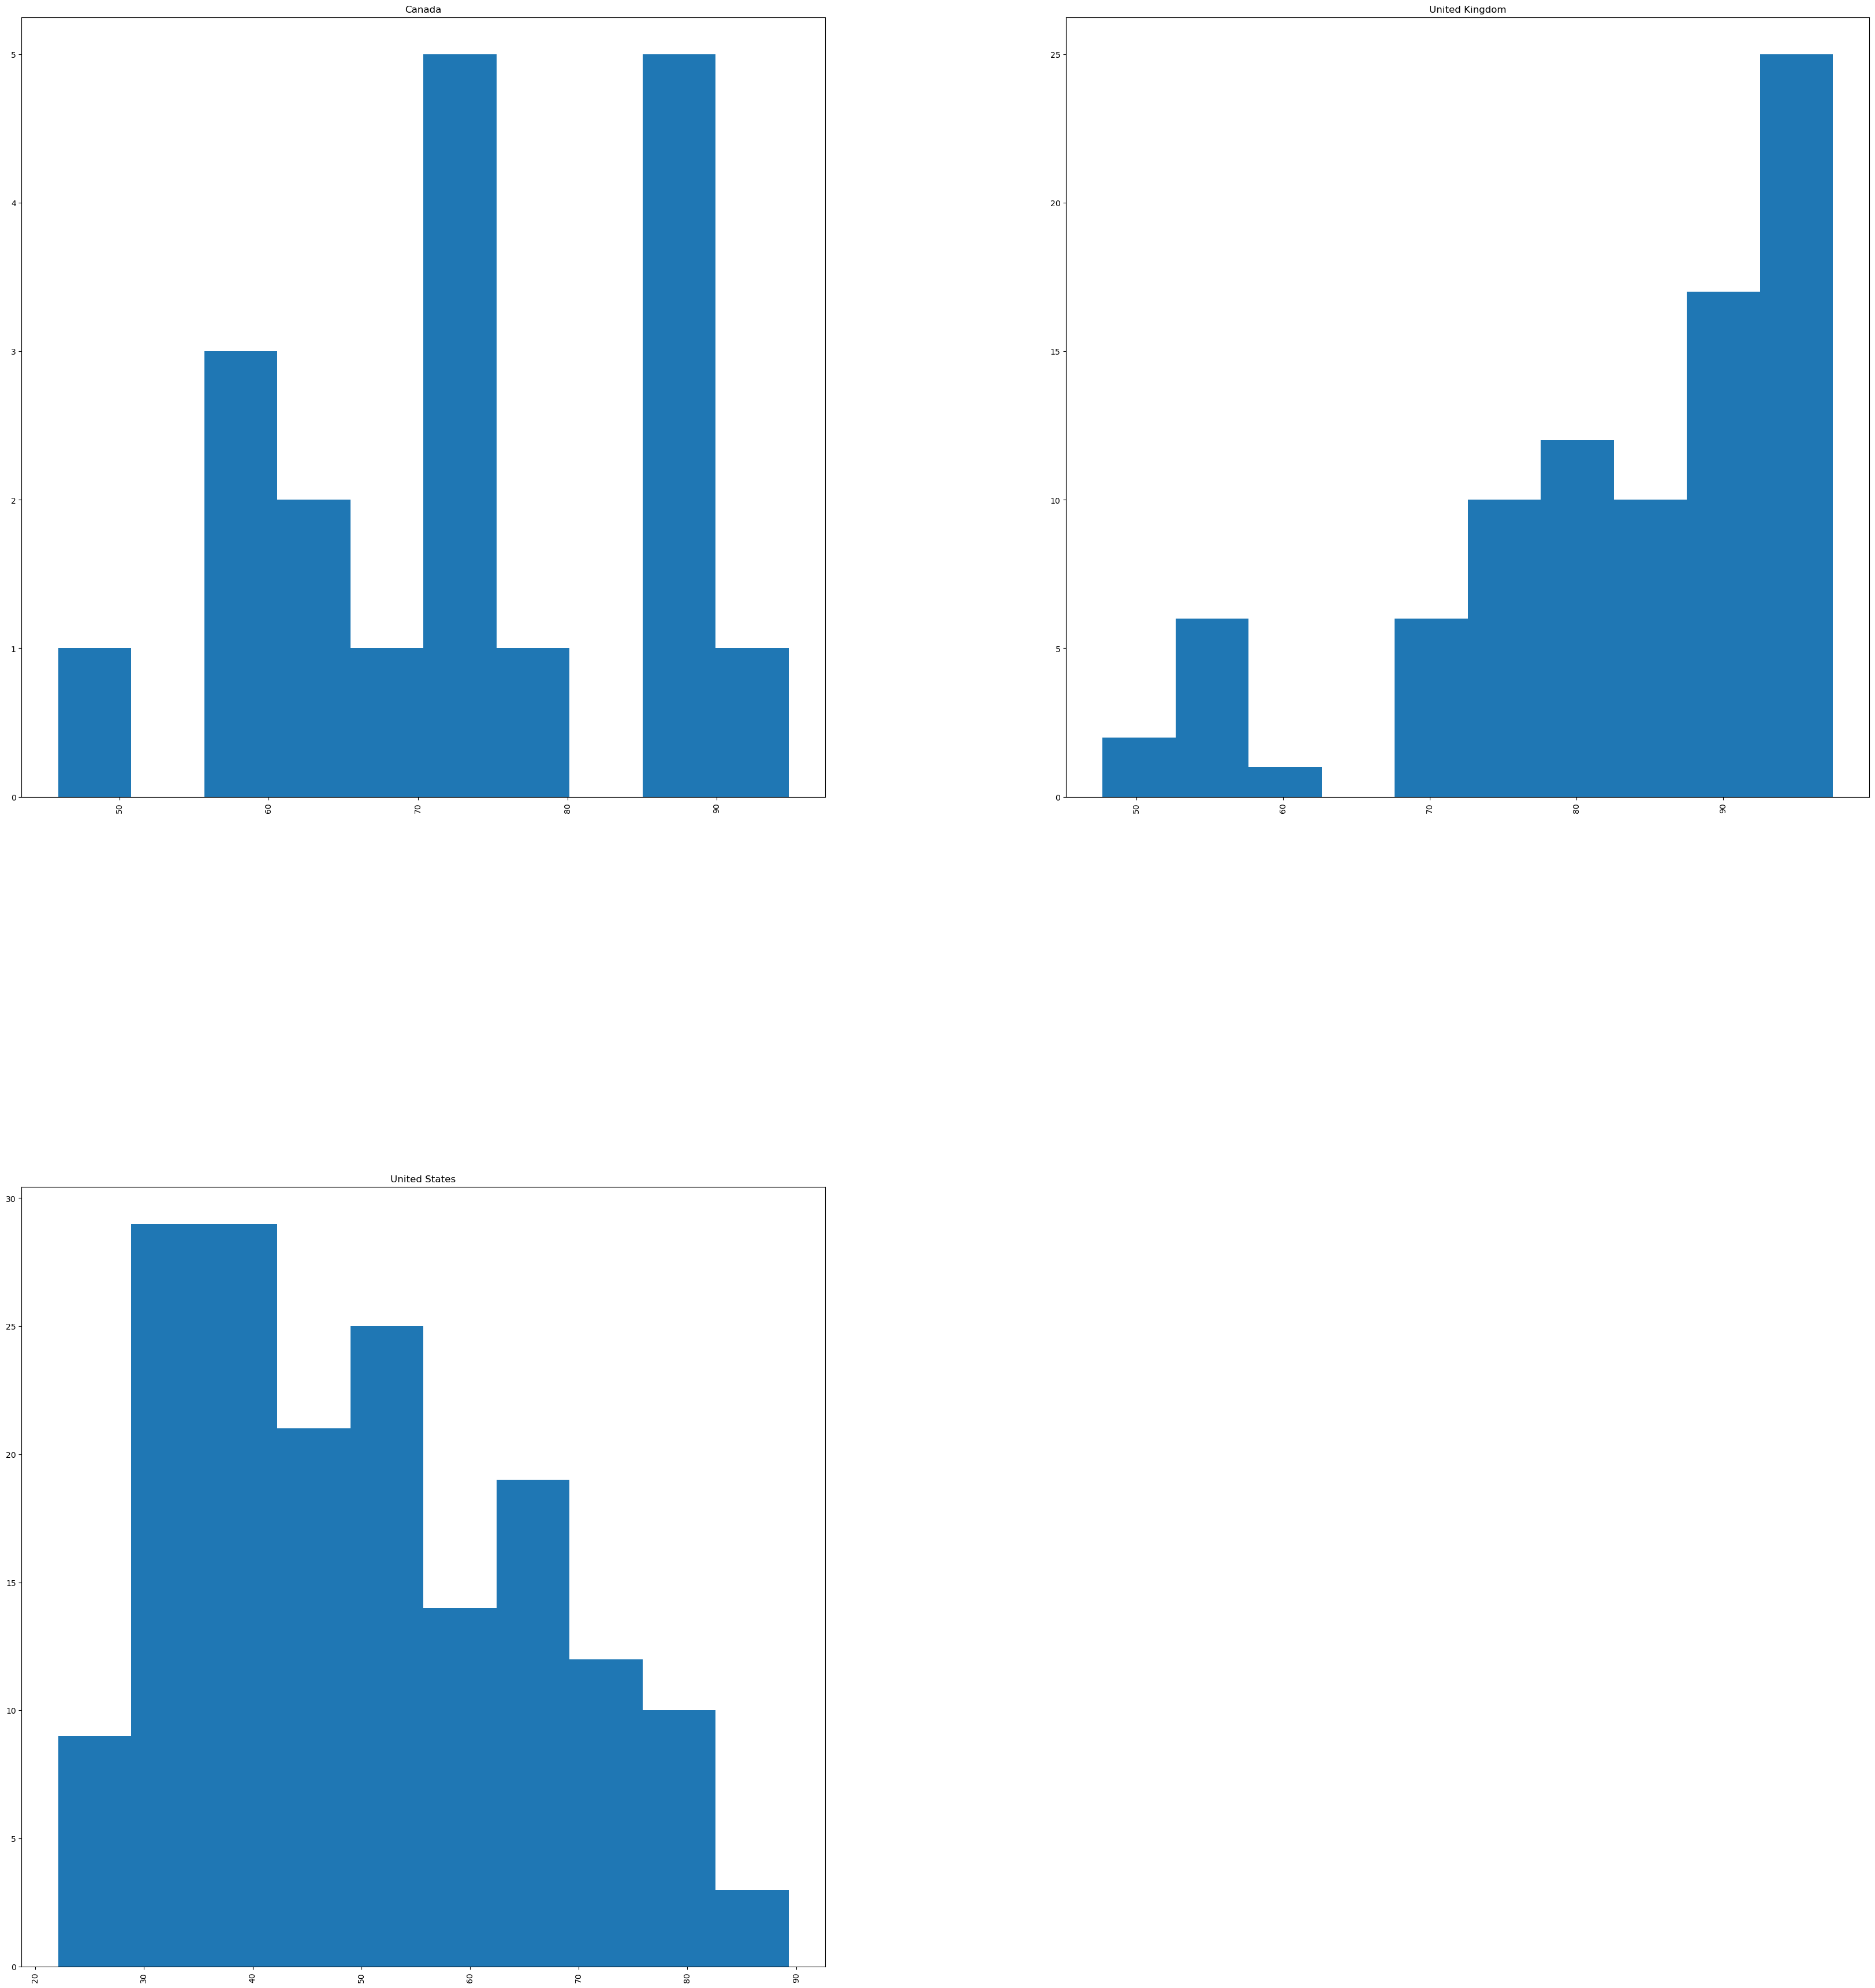

In [ ]:
locations_to_include = ["United States", "United Kingdom", "Canada"]
filtered_data = mydata[mydata['Location'].isin(locations_to_include)]
filtered_data.hist(by='Location', column='International Outlook Score', figsize=(40,45))

In [ ]:
np.random.seed(50)

In [ ]:
x = st.skewnorm.rvs(1, size=1000)

In [ ]:
x[3:10]

array([ 0.66001811, -0.58057541,  0.54937938,  1.42701278,  1.74778689,
        0.07965578, -0.34787282])

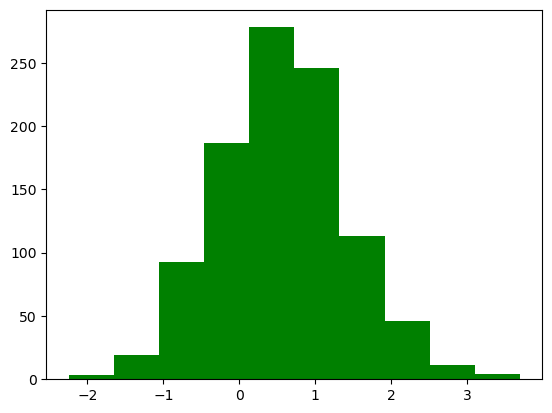

In [ ]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'green')

In [ ]:
xbar = x.mean()
xbar

0.5653324684111504

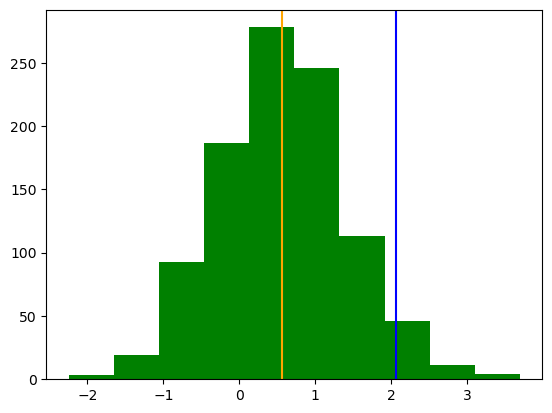

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
plt.axvline(x = x.mean()+1.5, color='blue')

_ = plt.hist(x, color = 'green')

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [ ]:
xbar = x.mean()
xbar

0.5653324684111504

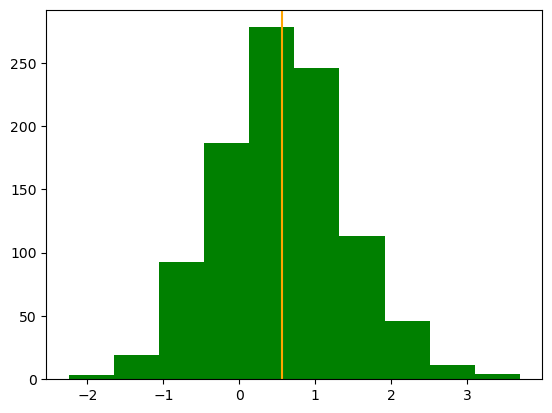

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'green')

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution:

In [ ]:
np.median(x)

0.5558992447303972

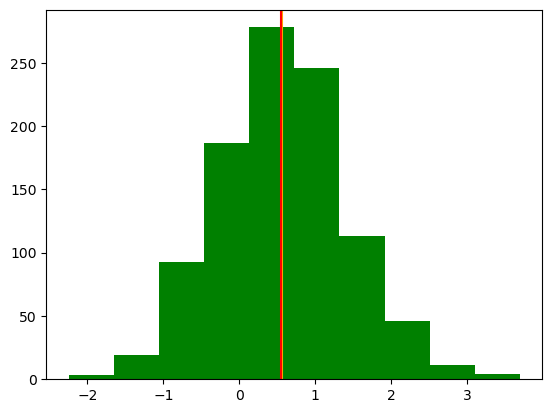

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='red')
_ = plt.hist(x, color = 'green')

### Measures of Dispersion

#### Variance

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [ ]:
x.var()

0.7198150702524777

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:
$$ \sigma = \sqrt{\sigma^2} $$

In [ ]:
sigma = x.std()
sigma

0.8484191595269862

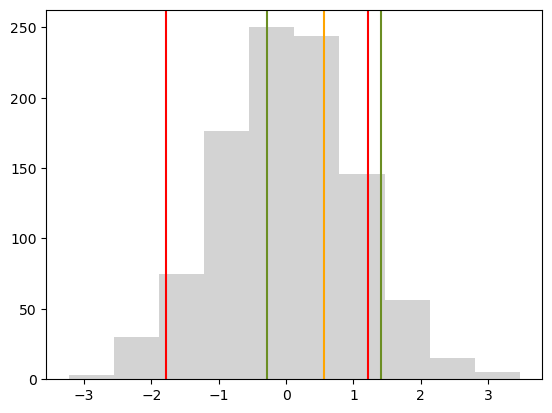

In [ ]:
fig, ax = plt.subplots()
x = st.skewnorm.rvs(0, size=1000)

plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
plt.axvline(x = xbar-sigma+1.5, color='red')
plt.axvline(x = xbar-sigma-1.5, color='red')
_ = plt.hist(x, color = 'lightgray')

<div class="alert alert-block alert-success">
<b>Project done in 2024/16/5</b>
</div>

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [ ]:
sigma/(x.size)**(1/2)

0.02682936954631021

In [ ]:
st.sem(x)

0.032224729369913496

In [ ]:
st.sem(x, ddof=0)

0.03220861297512206

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

## Gaussian Distribution

In [ ]:
x = np.random.normal(size=150000)

In [ ]:
sns.set_style('ticks')

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


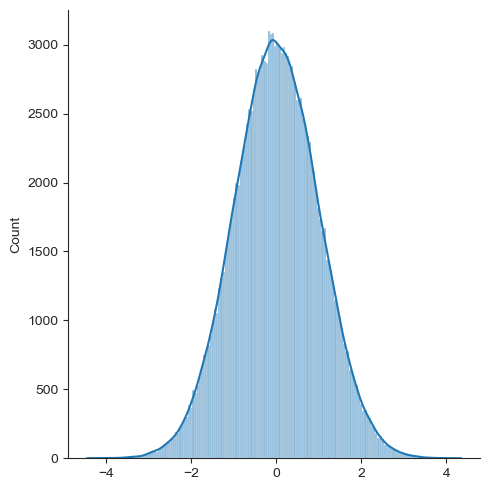

In [ ]:
_ = sns.displot(x, kde=True)

In [ ]:
x.mean()

0.0016377511620826026

In [ ]:
x.std()

0.9963175357572627

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial.
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept.

### The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [ ]:
x_sample = np.random.choice(x, size=15, replace=True)
x_sample

array([ 0.44470767, -0.20887802, -0.82251942,  1.30371651,  0.4820556 ,
       -0.97025743, -2.35364684,  0.94401932,  1.09098407,  0.13309089,
        0.00298397,  1.00490544,  0.45246904,  0.22985294,  1.28235265])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [ ]:
x_sample.mean()

0.20105575708176252

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


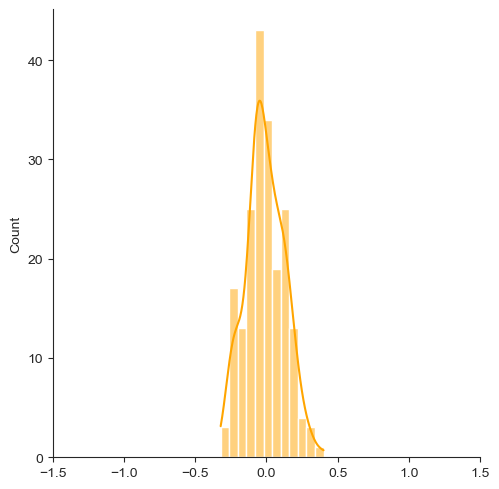

In [ ]:
sns.displot(sample_mean_calculator(x, 50, 200), color='orange', kde=True)
_ = plt.xlim(-1.5, 1.5)

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


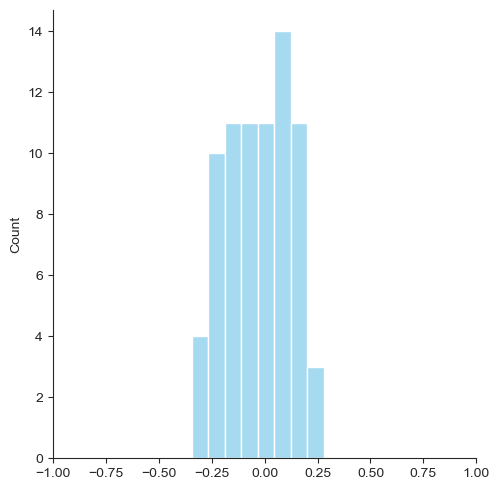

In [ ]:
sns.displot(sample_mean_calculator(x, 50, 75), color='skyblue', kde=False)
_ = plt.xlim(-1, 1)

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


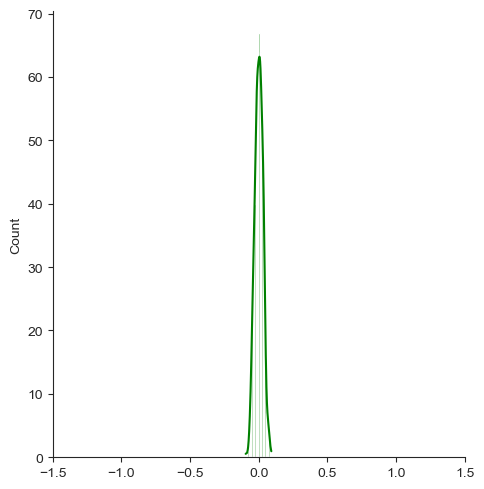

In [ ]:
sns.displot(sample_mean_calculator(x, 1000, 500), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


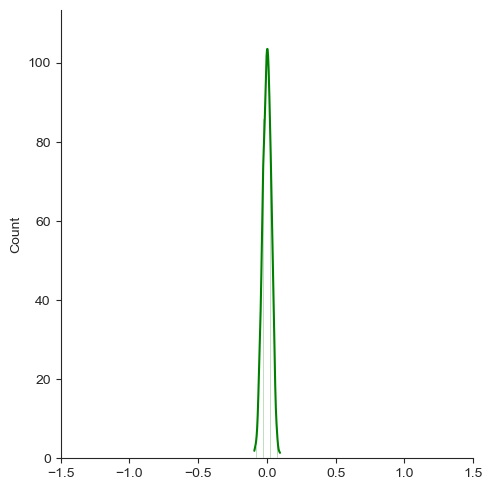

In [ ]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [ ]:
s = st.skewnorm.rvs(-500, size=10000)

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


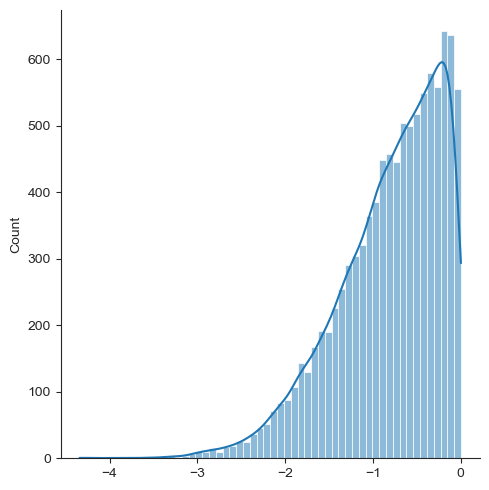

In [ ]:
_ = sns.displot(s, kde=True)

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


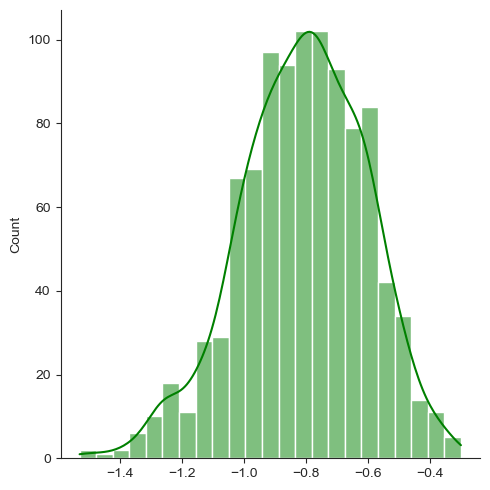

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


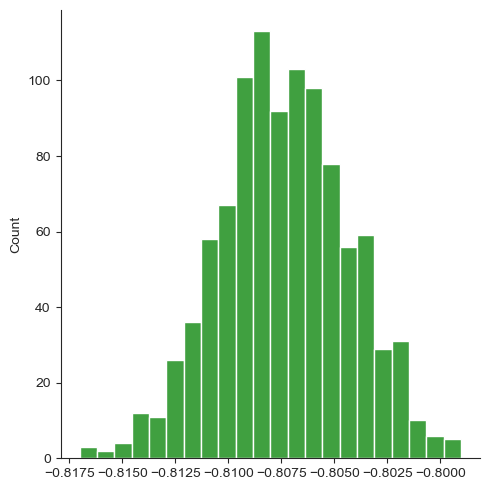

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 8000, 1000), color='green', kde=False)

In [ ]:
m = np.concatenate((np.random.normal(loc = 5.0, size=3000), np.random.normal(loc =9.0, size=8000)))

m1 = np.concatenate((np.random.normal(loc = 12.0,size=15000), np.random.normal(loc = 14.0, size=15000),np.random.normal(loc = 5.0,size=8000), np.random.normal(loc = 1.0, size=5000), np.random.normal(loc =9.0, size=3000)))

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


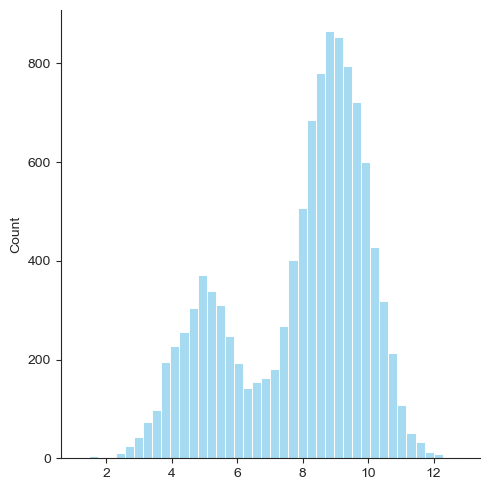

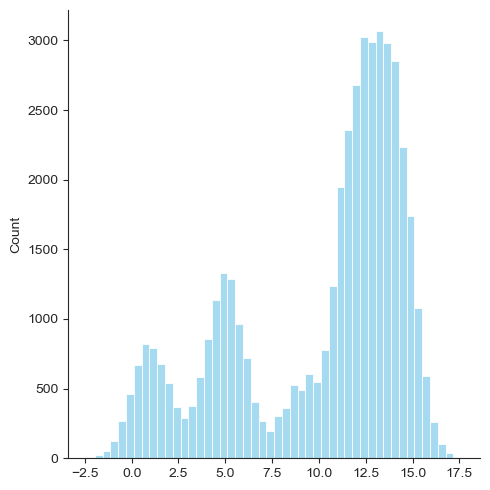

In [ ]:
_ = sns.displot(m, kde=False ,color="skyBlue")
_ = sns.displot(m1, kde=False ,color="skyBlue")

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


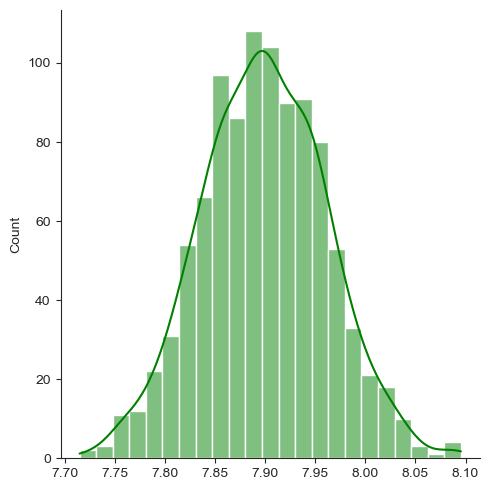

In [ ]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

### Sampling from uniform

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal:

In [ ]:
u = np.random.uniform(size=120000)

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


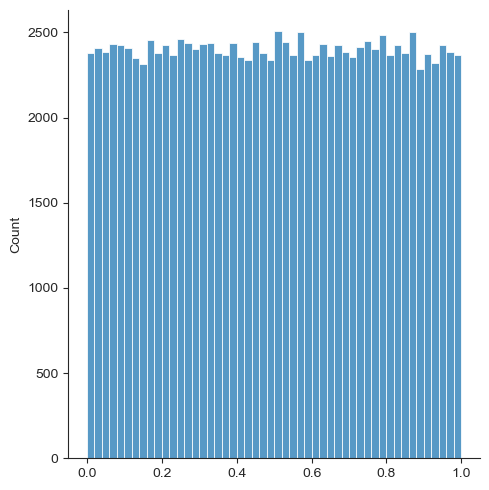

In [ ]:
_ = sns.displot(u)

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


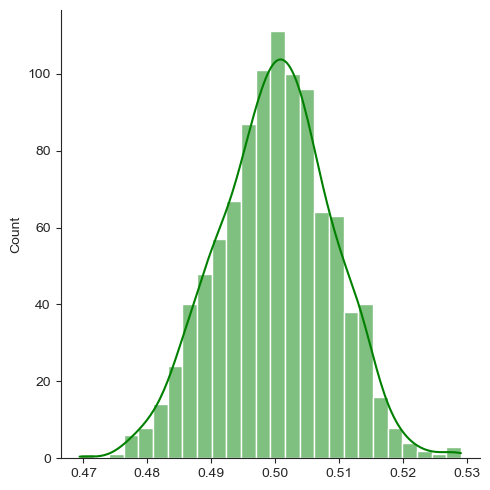

In [ ]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered shortly in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

# z-scores

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is:
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

In [ ]:
x_i = 82
mu = 72
sigma = 3

In [ ]:
x = np.random.normal(mu, sigma, 30000)

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


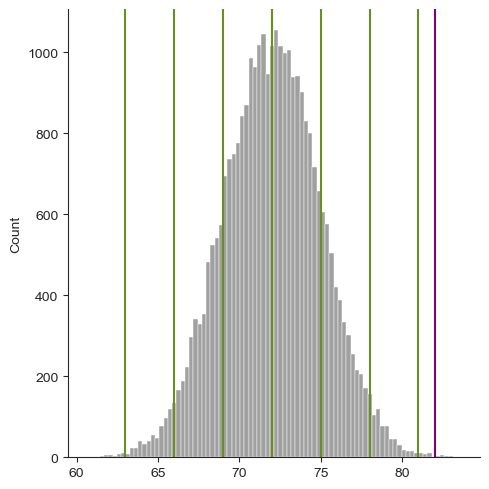

In [ ]:
sns.displot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 0, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [ ]:
z = (x_i - mu)/sigma
z

3.3333333333333335

In [ ]:
z = (x_i - np.mean(x))/np.std(x)
z

3.329128807702623

In [ ]:
len(np.where(x > 85)[0])

0

In [ ]:
100*69/10000

0.69

In [ ]:
np.percentile(x, 99)

78.9293607575644

In contrast, if the mean score of your peers is 95 and the standard deviation is 2:

In [ ]:
mu = 95
sigma = 2

In [ ]:
y = np.random.normal(mu, sigma, 100000)

C:\Users\shvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


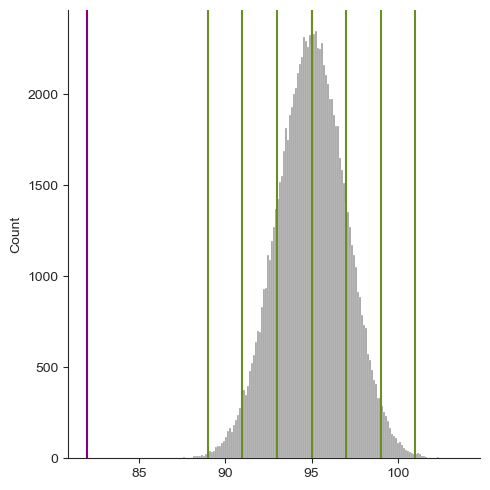

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 0, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations *below* the mean (!):

In [ ]:
z = (x_i - mu)/sigma
z

-6.5

In [ ]:
z = (x_i - np.mean(y))/np.std(y)
z

-6.512311480824162